In [6]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import random
import math
from scipy import stats
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.style.use('seaborn-darkgrid')

# train =  pd.read_csv('2016.csv', nrows = 50000, delimiter = ',')

p = 0.01  # 1% of lines
filename = '2016.csv'

# if random from [0,1] > p, skip row
df = pd.read_csv(
         filename,
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)

In [9]:
df.head()
df.tail()
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 109
count,56044.0,56044.000000,56044.000000,56044.000000,56044.000000,56044.000000,56044.000000,56044.000000,5.604400e+04,56044.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2016.0,2.510295,6.526140,15.746681,3.937192,19900.804047,2075.057972,12679.535383,1.267956e+06,31715.162444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,1.106478,3.402827,8.774354,1.987439,379.802052,1698.561546,1537.302116,1.537299e+05,1277.727045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013503e+06,30070.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,19790.000000,709.000000,11292.000000,1.129202e+06,30615.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,19805.000000,1635.000000,12889.000000,1.288903e+06,31453.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,20304.000000,2858.000000,14057.000000,1.405702e+06,32467.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,21171.000000,7439.000000,16218.000000,1.621801e+06,35991.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df['ARR_DELAY_NEW'].describe()

count    55248.000000
mean        11.620258
std         37.084557
min          0.000000
25%          0.000000
50%          0.000000
75%          6.000000
max       1146.000000
Name: ARR_DELAY_NEW, dtype: float64

In [14]:
df['ARR_DELAY'].describe()

count    55248.000000
mean         3.294418
std         40.660500
min        -79.000000
25%        -14.000000
50%         -6.000000
75%          6.000000
max       1146.000000
Name: ARR_DELAY, dtype: float64

In [28]:
df['TAIL_NUM'].describe()

count      55911
unique      4713
top       N480HA
freq          44
Name: TAIL_NUM, dtype: object

Unique tail numbers / planes from the 56k sample are 4713 (8.4%). Most frequent flied plane within this sample is Hawaiian Airlines plane, which makes sense because a typical flight in Hawaii is < 1 hr.

Text(0,0.5,'Observations')

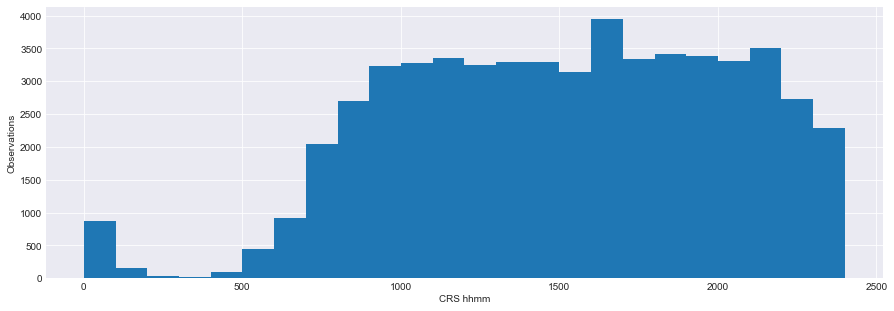

In [26]:
df['CRS_ARR_TIME'].hist(bins = 24, figsize = (15, 5))
plt.xlabel('CRS hhmm')
plt.ylabel('Observations')

In [16]:
print(df.describe().to_string())

          YEAR       QUARTER         MONTH  DAY_OF_MONTH   DAY_OF_WEEK  OP_CARRIER_AIRLINE_ID  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID  ORIGIN_STATE_FIPS    ORIGIN_WAC  DEST_AIRPORT_ID  DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID  DEST_STATE_FIPS      DEST_WAC  CRS_DEP_TIME      DEP_TIME     DEP_DELAY  DEP_DELAY_NEW     DEP_DEL15  DEP_DELAY_GROUP      TAXI_OUT    WHEELS_OFF     WHEELS_ON       TAXI_IN  CRS_ARR_TIME      ARR_TIME     ARR_DELAY  ARR_DELAY_NEW     ARR_DEL15  ARR_DELAY_GROUP     CANCELLED     DIVERTED  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME      AIR_TIME  FLIGHTS      DISTANCE  DISTANCE_GROUP  CARRIER_DELAY  WEATHER_DELAY    NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  FIRST_DEP_TIME  TOTAL_ADD_GTIME  LONGEST_ADD_GTIME  DIV_AIRPORT_LANDINGS  DIV_REACHED_DEST  DIV_ACTUAL_ELAPSED_TIME  DIV_ARR_DELAY  DIV_DISTANCE  DIV1_AIRPORT_ID  DIV1_AIRPORT_SEQ_ID  DIV1_WHEELS_ON  DIV1_TOTAL_GTIME  DIV1_LONGEST_GTIME  DIV1_WHEELS_OFF  DIV2_AIRPORT

In [29]:
df['SECURITY_DELAY'].describe()

count    9507.000000
mean        0.055433
std         1.387775
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        78.000000
Name: SECURITY_DELAY, dtype: float64

In [30]:
df['CARRIER_DELAY'].describe()

count    9507.000000
mean       19.822762
std        53.038508
min         0.000000
25%         0.000000
50%         2.000000
75%        18.500000
max      1049.000000
Name: CARRIER_DELAY, dtype: float64

In [31]:
df['WEATHER_DELAY'].describe()

count    9507.000000
mean        3.031766
std        25.035465
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1135.000000
Name: WEATHER_DELAY, dtype: float64